## INF1608 - Análise Numérica - 2016.1
## Departamento de Informática - PUC-Rio 
## Prof. Hélio Lopes - lopes@inf.puc-rio.br
## http://www.inf.puc-rio.br/~lopes

$$$$

## Aluno: Carlos Mattoso
## Matrícula: 1210553

## Lista 2

1) Considerando o método de mínimos quadrados para determinarmos o polinômio de grau d que ajusta um conjunto de pontos {(x[i],y[i]), i = 0..(N-1)}, faça: 

1a) Escreva uma função buildLSmatrix que monta a matriz A de tamanho Nx(d+1) e cujos elementos A[i,j] são dados por A[i,j] = (x[i])**j. Essa função recebe como parâmetros: o vetor x e o grau d do polinomio de ajuste.

1b) Escreva uma segunda função que retorne os coeficientes do polinomio de grau d que melhor ajusta o conjunto de pontos. Essa função recebe como parâmetros: o vetor x, o vetor y e o grau do polinomio de ajuste, e retorna o vetor c
que é a solução da equação normal (At A c = At y), onde At é a matriz transposta de A.

1c) Faça uma função evalp que retorna o valor de polinomio de grau d com os coeficientes dados pelo vetor c no ponto x. Essa função retornará o seguinte valor:  c_0 + c_1 * x + ... + c[d] * x**d.

1c) Como você mediria o erro quadrático da __aproximação__ pelo método de mínimos quadrados?

1d) Considere que:
x = [1.0,2.0,3.0,4.0,5.0]
y = [3.0,6.0,2.0,10.0,2.0] 
Qual foi o erro quadrático da aproximação por um polinômio de grau 1 ? E para um de grau 2? E um de grau 3?


[[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]]
[ 11.6        -13.21428571   6.03571429  -0.75      ]
0.454153977928
3.67142857143


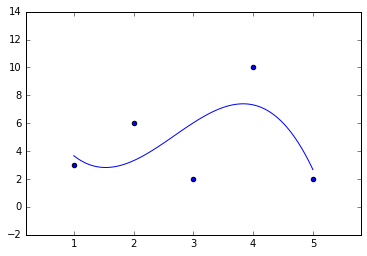

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Função adaptada da aula de Interpolação Polinomial
def evalp(x,c):
    if (len(c)==1):
        return c[0]
    else:
        return c[0] + x * evalp(x, c[1:])

def buildLSmatrix(x,d):
    n = len(x)
    A = np.ones((n, d+1)) # primeira coluna já sai toda em 1
    for i in range(n):
        for j in range(1, d+1):
            A[i,j] = x[i]**j
    return A

def LeastSquares(x,y,d):
    A = buildLSmatrix(x,d)
    At = np.transpose(A)
    AtA = At.dot(A)
    Aty = At.dot(y)
    return np.linalg.solve(AtA, Aty), A

def drawLSpolynomial(x,y,c,N,xmin,xmax):
    delta = (xmax-xmin)/(N-1.0)
    px = np.zeros(N)
    py = np.zeros(N)
    for i in range(N):
        xp = xmin + i*delta
        px[i] = xp
        py[i] = evalp(xp,c)
    plt.figure() # cria um novo plot
    plt.scatter(x,y)
    plt.plot(px,py)
    deltax = xmax - xmin
    plt.xlim(xmin-0.2*deltax, xmax+0.2*deltax)
    ymin = min([min(y),min(py)])
    ymax = max([max(y),max(py)])
    deltay = (ymax-ymin)
    plt.ylim(ymin-0.5*deltay,ymax+0.5*deltay)
    plt.show()

x = [1.0,2.0,3.0,4.0,5.0]
y = [3.0,6.0,2.0,10.0,2.0] 
d = 3

A = buildLSmatrix(x,d)
print(A)

c, _ = LeastSquares(x,y,d)
print(c)

erro = np.linalg.norm(A.dot(c)-y)/np.linalg.norm(y)
print(erro)

v = evalp(1.0,c)
print(v)

drawLSpolynomial(x,y,c,100,min(x),max(x))

**1.c) e 1.d)** Para se calcular o erro quadrático da aproximação do métodos de mínimos quadrados, basta calcular o vetor de resíduos de erro e elevar este ao quadrado. O caso ideal seria justamente que este vetor fosse nulo, indicando uma aproximação perfeita. Seja $e$ o vetor de resíduos, $A$ a matriz de mínimos quadrados, $c$ os coeficientes do polinômio que o método retorna e $y$ a variável dependente:
$$e = (Ac - y)$$
$$e^{2} = (Ac - y) * (Ac - y)^{t}$$
$e^{2}$ é um vetor que contém os erros quadráticos por cada observação.

Erro quadrático para d=1: 46.800000


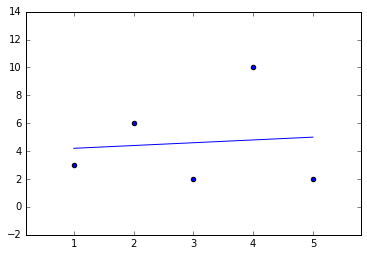

Erro quadrático para d=2: 39.657143


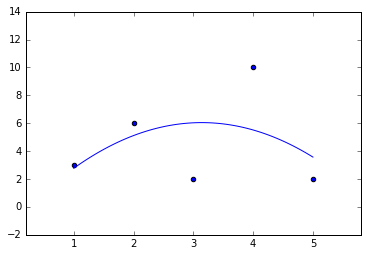

Erro quadrático para d=3: 31.557143


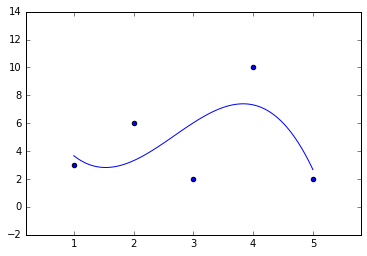

In [2]:
def squared_error(A,c,y):
    residuals = A.dot(c) - y
    return np.dot(residuals, residuals)

x = [1.0,2.0,3.0,4.0,5.0] 
y = [3.0,6.0,2.0,10.0,2.0]

for d in range(1,4):
    coef, ls_matrix = LeastSquares(x,y,d)
    
    print("Erro quadrático para d=%d: %f" % (d,squared_error(ls_matrix,coef,y)))
    drawLSpolynomial(x,y,coef,100,min(x),max(x))

2) Façam a leitura e alguns exercícios do capítulo de Autovalores e Autovetores do livro do Anton-Rorres.



Avançando um pouco mais...leia com atenção os seguintes resultados:

__TEOREMA ESPECTRAL__: Considere uma matriz real A simétrica (At = A) de tamanho nxn.  Então existe uma base ortonormal de $R^n$ formada pelos autovetores de A. 

__TEOREMA__: Se A é uma matriz real e simétrica, então os autovalores de A serão todos números reais.

__TEOREMA__: Se A é uma matriz real e simétrica, então os autovetores $v_1$ e $v_2$ associados a autovalores distintos de A são ortogonais entre si.

3) Mostre que se $v$ é um autovetor associado ao autovalor $\lambda$ de A e A é inversível, então $v$ é um autovetor associado ao autovalor $1/lambda$ da matriz inversa de A.

$$Av = \lambda v$$
$$A^{-1}Av = \lambda A^{-1}v$$
$$v = \lambda A^{-1}v$$
$$\frac{1}{\lambda} v = A^{-1}v, \, CQD$$

4) Mostre que se $v$ é um autovetor associado ao autovalor $\lambda$ de A, então $v$ é um autovetor associado ao autovalor $0$ da matriz B = A - $\frac{\lambda}{v^tv} v v^t$.

Para isto, devemos partir de $Bv = 0 v$ e chegar em $Av = \lambda v$:
$$(A - \frac{\lambda}{v^tv} vv^t) v = 0 v$$
Para que isto seja verdade, tem-se que:
$$(A - \frac{\lambda}{v^tv} vv^t) = 0$$
$$A = \frac{\lambda}{v^tv} vv^t$$
Multiplicando ambos os lados por $v$:
$$Av = \frac{\lambda}{(v^tv)} v(v^t v)$$
O termo $v^t v$ no numerador corta com o do denominador, logo:
$$Av = \lambda v, \, CQD$$

5) Assumindo que A é uma matriz real simétrica que possui n autovalores distintos, utilize o resultado do exercício 3 e o método da potência para construir um novo método que computa todos os autovalores de A. (Esse método é chamado de método da deflação). O método da potência está implementado abaixo:

In [3]:
import numpy as np

def innerprod(u,v):
    n = len(u)
    res = 0.0
    for i in range(n):
        res += u[i]*v[i]
    return res

def prod(A,x):
    n = len(A) 
    res = np.copy(x)
    for i in range(n):
        res[i] = 0.0
        for j in range(n):
            res[i] += A[i,j]*x[j]
    return res

def normalize(v):
    w = np.zeros(len(v))
    norma = np.linalg.norm(v)
    if (norma == 0.0):
        return w
    for i in range(len(v)):
        w[i] = v[i]/norma
    return w

def powermethod(A,v,maxiter,eps):
    x0 = normalize(v) 
    n  = len(A)
    for i in range(maxiter):
        x1 = prod(A,x0)
        x1 = normalize(x1)
        erro = np.linalg.norm(x1-x0)
        if (erro < eps):
            # print(i)
            break
        x0 = np.copy(x1)
    x1 = prod(A,x0)
    lambda1 = innerprod(x1,x0)
    return lambda1,x0

def display_results(A, v0):
    print("A:")
    print(A)
    print("v0:")
    print(v0)
    
    print("Resposta esperada")
    w_exp, v_exp = np.linalg.eigh(A)
    print("Autovalores de A:")
    print(w_exp)
    print("Autovetores de A:")
    print(v_exp)

    print("\nResposta obtida:")
    w, v = deflation_method(A,v0,2000,1e-20)
    print("Autovalores de A:")
    print(w)
    print("Autovetores de A:")
    print(np.round(v, decimals=10))
    print

# Baseado no que resolvemos no exercício 4 e nestas notas: http://zoro.ee.ncku.edu.tw/na2007/res/NA09.pdf
def deflation_method(A,v,maxiter=100,eps=1e-10):
    n = len(A)
    
    eigen_vals = np.zeros(n)
    eigen_vec  = np.zeros((n,n))
    
    v0 = np.copy(v)
    B = np.copy(A)
    for i in range(n):
        w,v = powermethod(B,v0,maxiter,eps)
        v = np.matrix(v)
        
        # salva os autovalores e autovetores
        eigen_vals[i] = w
        eigen_vec[:,i] = v[:] # coloca o i-ésimo autovetor na i-ésima coluna de `eigen-vec`
        
        # faz a deflação com a equação do item 4
        vt = np.transpose(v)
        
        B = B - ((w/(v * vt)[0,0]) * (vt * v))
    return eigen_vals, eigen_vec

A = np.matrix([[1.0,2.0],[2.0,1.0]])
v0 = np.array([2.0,1.0])
display_results(A, v0)

A = np.diag([1.0,2.0,3.0])
v0 = np.array([2.0,1.5,1.0])
display_results(A, v0)

A:
[[ 1.  2.]
 [ 2.  1.]]
v0:
[ 2.  1.]
Resposta esperada
Autovalores de A:
[-1.  3.]
Autovetores de A:
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]

Resposta obtida:
Autovalores de A:
[ 3. -1.]
Autovetores de A:
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

A:
[[ 1.  0.  0.]
 [ 0.  2.  0.]
 [ 0.  0.  3.]]
v0:
[ 2.   1.5  1. ]
Resposta esperada
Autovalores de A:
[ 1.  2.  3.]
Autovetores de A:
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]

Resposta obtida:
Autovalores de A:
[ 3.  2.  1.]
Autovetores de A:
[[ 0.  0.  1.]
 [ 0.  1. -0.]
 [ 1. -0. -0.]]



6) A função np.linalg.eig(A) retorna todos os autovalores e autovetores da matriz A. Utilizando essa função determine a direção de maior variação dos dados e a de menor variação dos dados da tabela:


In [4]:
import numpy as np

def padroniza(T):
    m = np.shape(T)[0]
    n = np.shape(T)[1]
    TP = np.copy(T)
    Media = np.zeros(n)
    for j in range(n):
        Media[j] = 0.0
        for i in range(m):
            Media[j] += T[i,j]
        Media[j] /= m
    Variancia = np.zeros(n)
    for j in range(n):
        Variancia[j] = 0.0
        for i in range(m):
            Variancia[j] += (T[i,j]-Media[j])**2
        Variancia[j] /= (m-1)
    for j in range(n):
        for i in range(m):
            TP[i,j] = (T[i,j]-Media[j])/np.sqrt(Variancia[j])
    return TP

T = np.genfromtxt('protein.txt', delimiter=',')
print(T)

TP = padroniza(T)

SIGMA = np.cov(TP)
print(np.shape(SIGMA))

w, v = np.linalg.eigh(SIGMA)

print("Autovalores:")
print(w)

print("Autovetores:")
print(v)


[[ 10.1   1.4   0.5   8.9   0.2  42.3   0.6   5.5   1.7]
 [  8.9  14.    4.3  19.9   2.1  28.    3.6   1.3   4.3]
 [ 13.5   9.3   4.1  17.5   4.5  26.6   5.7   2.1   4. ]
 [  7.8   6.    1.6   8.3   1.2  56.7   1.1   3.7   4.2]
 [  9.7  11.4   2.8  12.5   2.   34.3   5.    1.1   4. ]
 [ 10.6  10.8   3.7  25.    9.9  21.9   4.8   0.7   2.4]
 [  8.4  11.6   3.7  11.1   5.4  24.6   6.5   0.8   3.6]
 [  9.5   4.9   2.7  33.7   5.8  26.3   5.1   1.    1.4]
 [ 18.    9.9   3.3  19.5   5.7  28.1   4.8   2.4   6.5]
 [ 10.2   3.    2.8  17.6   5.9  41.7   2.2   7.8   6.5]
 [  5.3  12.4   2.9   9.7   0.3  40.1   4.    5.4   4.2]
 [ 13.9  10.    4.7  25.8   2.2  24.    6.2   1.6   2.9]
 [  9.    5.1   2.9  13.7   3.4  36.8   2.1   4.3   6.7]
 [  9.5  13.6   3.6  23.4   2.5  22.4   4.2   1.8   3.7]
 [  9.4   4.7   2.7  23.3   9.7  23.    4.6   1.6   2.7]
 [  6.9  10.2   2.7  19.3   3.   36.1   5.9   2.    6.6]
 [  6.2   3.7   1.1   4.9  14.2  27.    5.9   4.7   7.9]
 [  6.2   6.3   1.5  11.1   1. 

Com base no artigo de [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis#Computing_PCA_using_the_covariance_method) da Wikipédia, a direção de maior variação dos dados é a do autovetor associado ao maior autovetor da matriz de covariância `SIGMA` calculada acima. Analogamente, a direção de menor variação é a do autovetor associado ao menor autovalor desta matriz. Observando  acima, nota-se que o vetor de autovalores já está ordenado crescentemente. Como a função `np.linalg.eigh` nos retorna os autovalores e autovetores pareados em seus respetivos vetores, o maior autovetor é o último elemento de `v` e o menor, o primeiro:

In [5]:
print("Direção de maior variação:")
print(v[-1])

print("Direção de menor variação:")
print(v[0])

Direção de maior variação:
[ 0.31971356 -0.04157767  0.16875271  0.01176255 -0.242144    0.07074926
  0.5614708  -0.07890205  0.04302383 -0.12500732 -0.171393    0.01836399
  0.13406384  0.29906528  0.23035957  0.04211109 -0.19736787 -0.03507618
  0.00122168  0.0473323   0.04787877  0.2686207  -0.05151053  0.17419413
 -0.35072666]
Direção de menor variação:
[ 0.13265578  0.08239776  0.03101263  0.01485703  0.05462751 -0.0257677
 -0.00736889  0.02268624 -0.04373294  0.03081966 -0.0111979   0.00656175
  0.09789895  0.01178232  0.00713214  0.05077324  0.70739956  0.34915086
 -0.23716958 -0.14288231  0.09016724 -0.02312104  0.34612339  0.20038457
 -0.29533951]


A fim de determinar a "capacidade descritiva" o autovetor associado ao maior autovalor, pode-se calcular sua contribuição a função de energia descrita sobre os autovalores. Da Wikipédia:

> The eigenvalues represent the distribution of the source data's energy among each of the eigenvectors, where the eigenvectors form a basis for the data. The cumulative energy content g for the jth eigenvector is the sum of the energy content across all of the eigenvalues from $1$ through $j$:

Calculemos então $q$ para determinar a contribuição do autovetor dominante:

In [6]:
n = len(w)
g = np.zeros(n)
for i in range(n):
    g[i] = sum(np.absolute(w[:i+1]))
print("Energia cumulativa:")
print(g)

# Calcula a energia proporcional
g_prop = g / g[-1]
print("Energia proporcional cumulativa:")
print(g_prop)

# Finalmente, calcula a proporção do autovetor dominante
print("Energia proporcional do autovetor dominante:")
print("%.2f%%" % (w[-1]/g[-1] * 100.0))

print("Energia proporcional do autovetor assoc. ao menor autovalor:")
print("%f%%" % (abs(w[0])/g[-1] * 100.0))

Energia cumulativa:
[  8.32926171e-16   1.25193549e-15   1.55553827e-15   1.80528326e-15
   2.00017957e-15   2.07215646e-15   2.10699558e-15   2.12278946e-15
   2.13448349e-15   2.22046372e-15   2.33136028e-15   2.48479358e-15
   2.79392535e-15   3.20911771e-15   3.67408641e-15   4.32647210e-15
   5.80624944e-15   3.29150363e-01   1.04748512e+00   1.92846626e+00
   3.27992849e+00   5.63914566e+00   8.96669223e+00   1.35022898e+01
   2.46349171e+01]
Energia proporcional cumulativa:
[  3.38107966e-17   5.08195536e-17   6.31436373e-17   7.32814832e-17
   8.11928677e-17   8.41146107e-17   8.55288276e-17   8.61699452e-17
   8.66446384e-17   9.01348159e-17   9.46364165e-17   1.00864702e-16
   1.13413223e-16   1.30267039e-16   1.49141415e-16   1.75623570e-16
   2.35691860e-16   1.33611313e-02   4.25203428e-02   7.82818244e-02
   1.33141446e-01   2.28908652e-01   3.63983048e-01   5.48095606e-01
   1.00000000e+00]
Energia proporcional do autovetor dominante:
45.19%
Energia proporcional do autov

O autovetor dominante contribui para 45% da informação que se pode extrair dos dados! Bem significante.